In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('/workspaces/EDA_3/data/raw/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
print(len(df.drop_duplicates()))

1337


In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.shape

(1337, 7)

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

## ANÁLISIS UNIVARIANTE

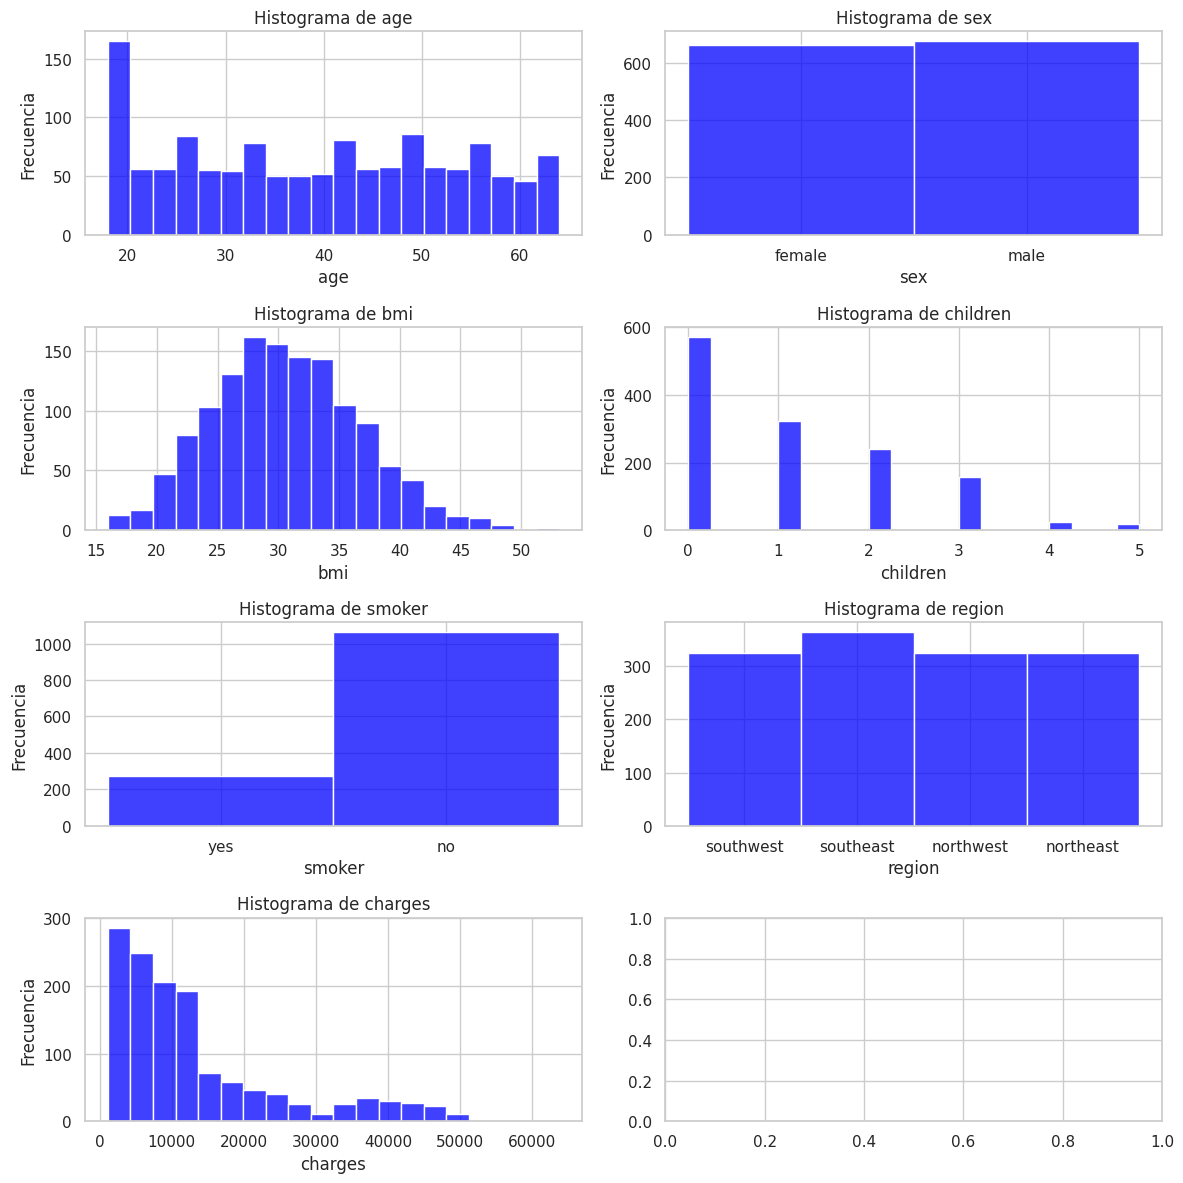

In [29]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Obtener el número de columnas en el DataFrame
num_columns = len(df.columns)

# Establecer el número de subgráficos por fila
num_subplots_per_row = 2

# Calcular el número total de filas necesarias
num_rows = (num_columns + num_subplots_per_row - 1) // num_subplots_per_row

# Crear subgráficos
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(12, 3 * num_rows))

# Aplanar la matriz de subgráficos para facilitar la iteración
axes = axes.flatten()

# Iterar por cada columna y crear un histograma
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(df[column], kde=False, bins=20, color='blue', ax=ax)  # Puedes ajustar los parámetros según tus preferencias
    ax.set_title(f'Histograma de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

In [30]:
# Creamos una función que factoriza los valores insertados
def factor(column):
    df[column] = pd.factorize(df[column])[0]

# Creamos otra función que nos almacenará el nombre de las etiquetas en una lista
tag_list = []
def tags (column):
    tag_string = pd.factorize(df[column])[1]
    tag_list.append(tag_string)

# Creamos una lista de las columnas categóricas
to_factor = ["sex", "smoker", "region"]

# Iteramos sobre esta lista para pasar cada elemento a la función
for i in to_factor:
    tags(i)   

for i in to_factor:
    factor(i)


df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [31]:
tag_list

[Index(['female', 'male'], dtype='object'),
 Index(['yes', 'no'], dtype='object'),
 Index(['southwest', 'southeast', 'northwest', 'northeast'], dtype='object')]

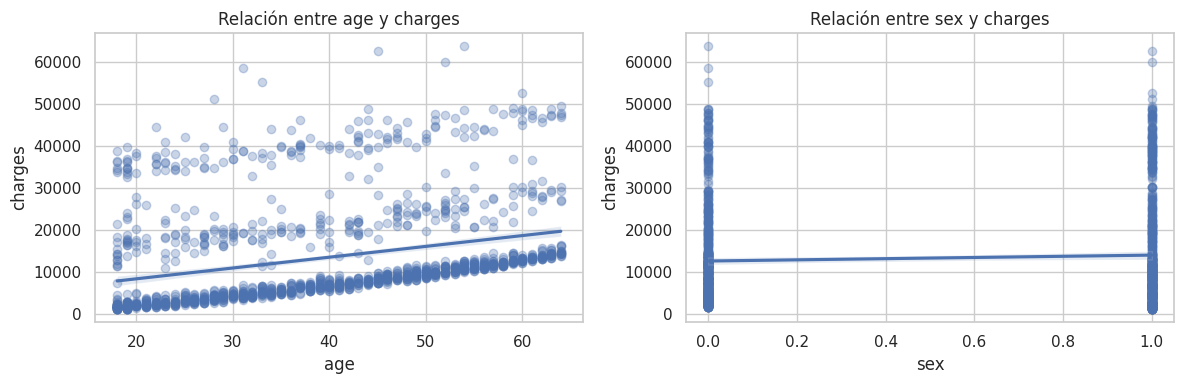

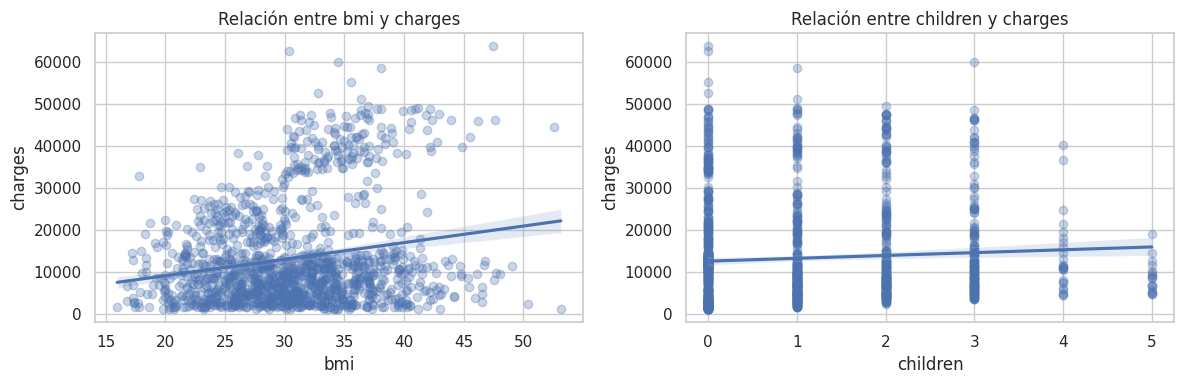

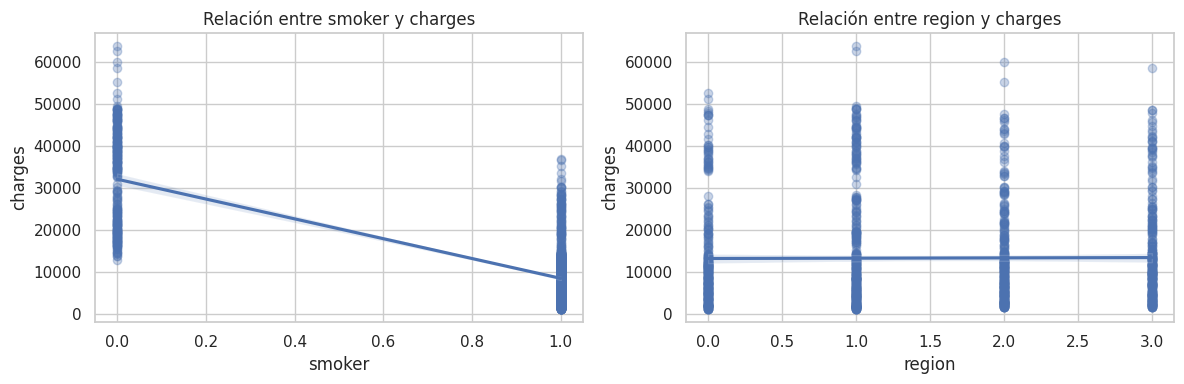

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

target_column = 'charges'

feature_columns = [col for col in df.columns if col != target_column]

# Dividir las columnas en pares
column_pairs = [(feature_columns[i], feature_columns[i+1]) for i in range(0, len(feature_columns), 2)]

# Iterar a través de los pares de columnas y trazar regplots
for pair in column_pairs:
    # Crear una figura con dos subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Iterar sobre las dos columnas del par
    for i, feature_column in enumerate(pair):
        # Crear un gráfico de dispersión con línea de regresión
        sns.regplot(x=feature_column, y=target_column, data=df, scatter_kws={'alpha':0.3}, ax=axes[i])
        
        # Configuración del título y etiquetas
        axes[i].set_title(f'Relación entre {feature_column} y {target_column}')
        axes[i].set_xlabel(feature_column)
        axes[i].set_ylabel(target_column)
    
    # Ajustar el diseño y mostrar el gráfico
    plt.tight_layout()
    plt.show()

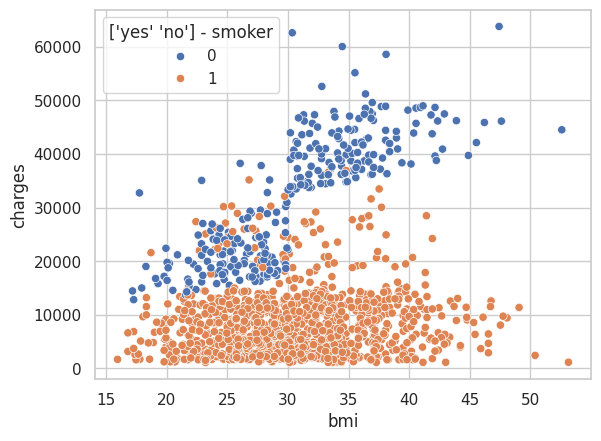

In [33]:
tag_smoker = tag_list[1]
tag_content = tag_smoker.values
sns.scatterplot(data = df, x = "bmi", y = "charges", hue = "smoker")
plt.legend(title=f"{tag_content} - {df['smoker'].name}") 
plt.show()

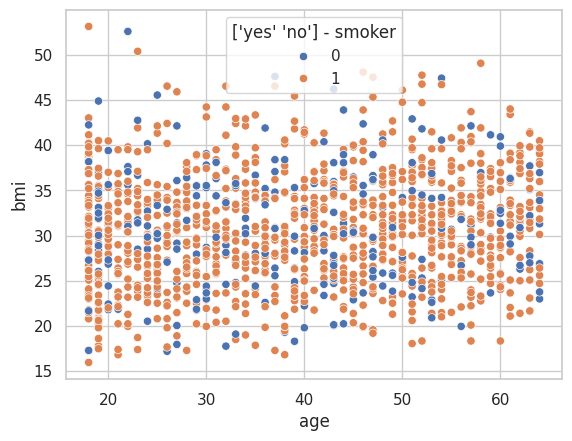

In [34]:
sns.scatterplot(data = df, x = "age", y ="bmi", hue = "smoker")
plt.legend(title=f"{tag_content} - {df['smoker'].name}") 
plt.show()

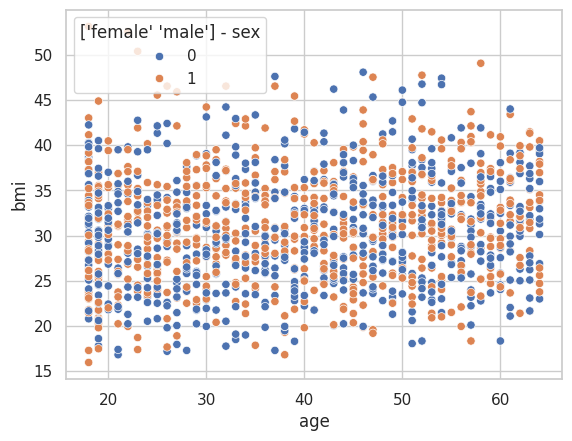

In [35]:
tag_sex = tag_list[0]
tag_content2 = tag_sex.values
sns.scatterplot(data = df, x = "age", y ="bmi", hue = "sex")
plt.legend(title=f"{tag_content2} - {df['sex'].name}") 
plt.show()

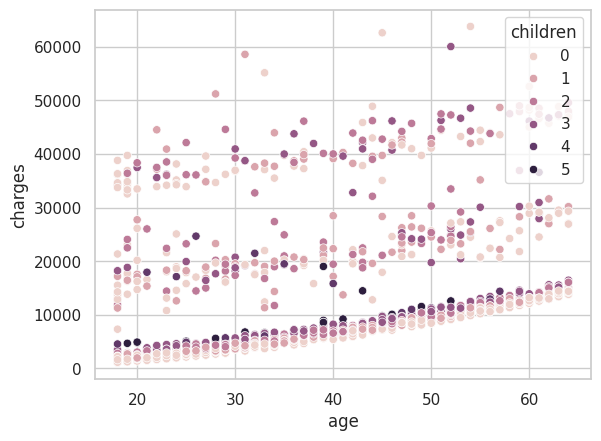

In [36]:

sns.scatterplot(data = df, x = "age", y = "charges", hue = "children")

plt.show()

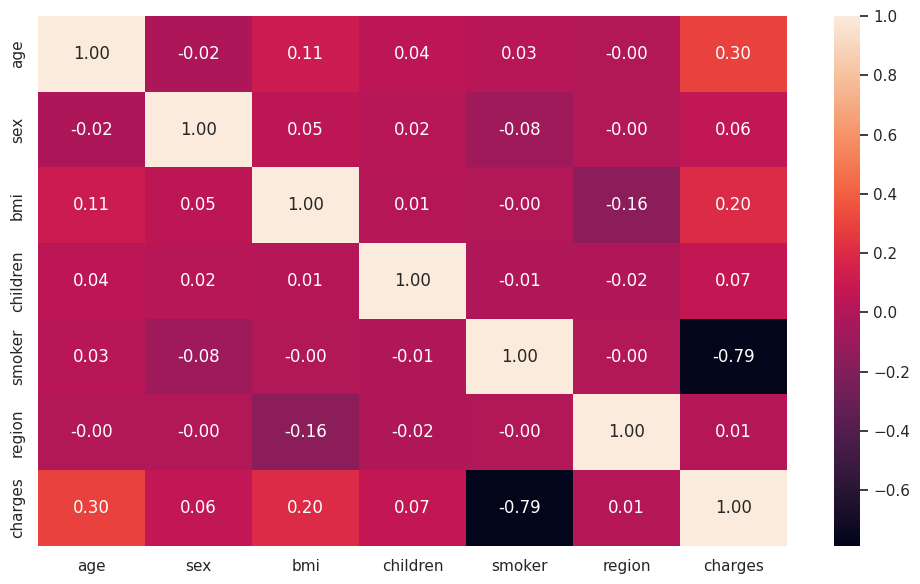

In [37]:
fig, axis = plt.subplots(figsize = (10, 6))
lista_de_columnas = df.columns.tolist()
sns.heatmap(df.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

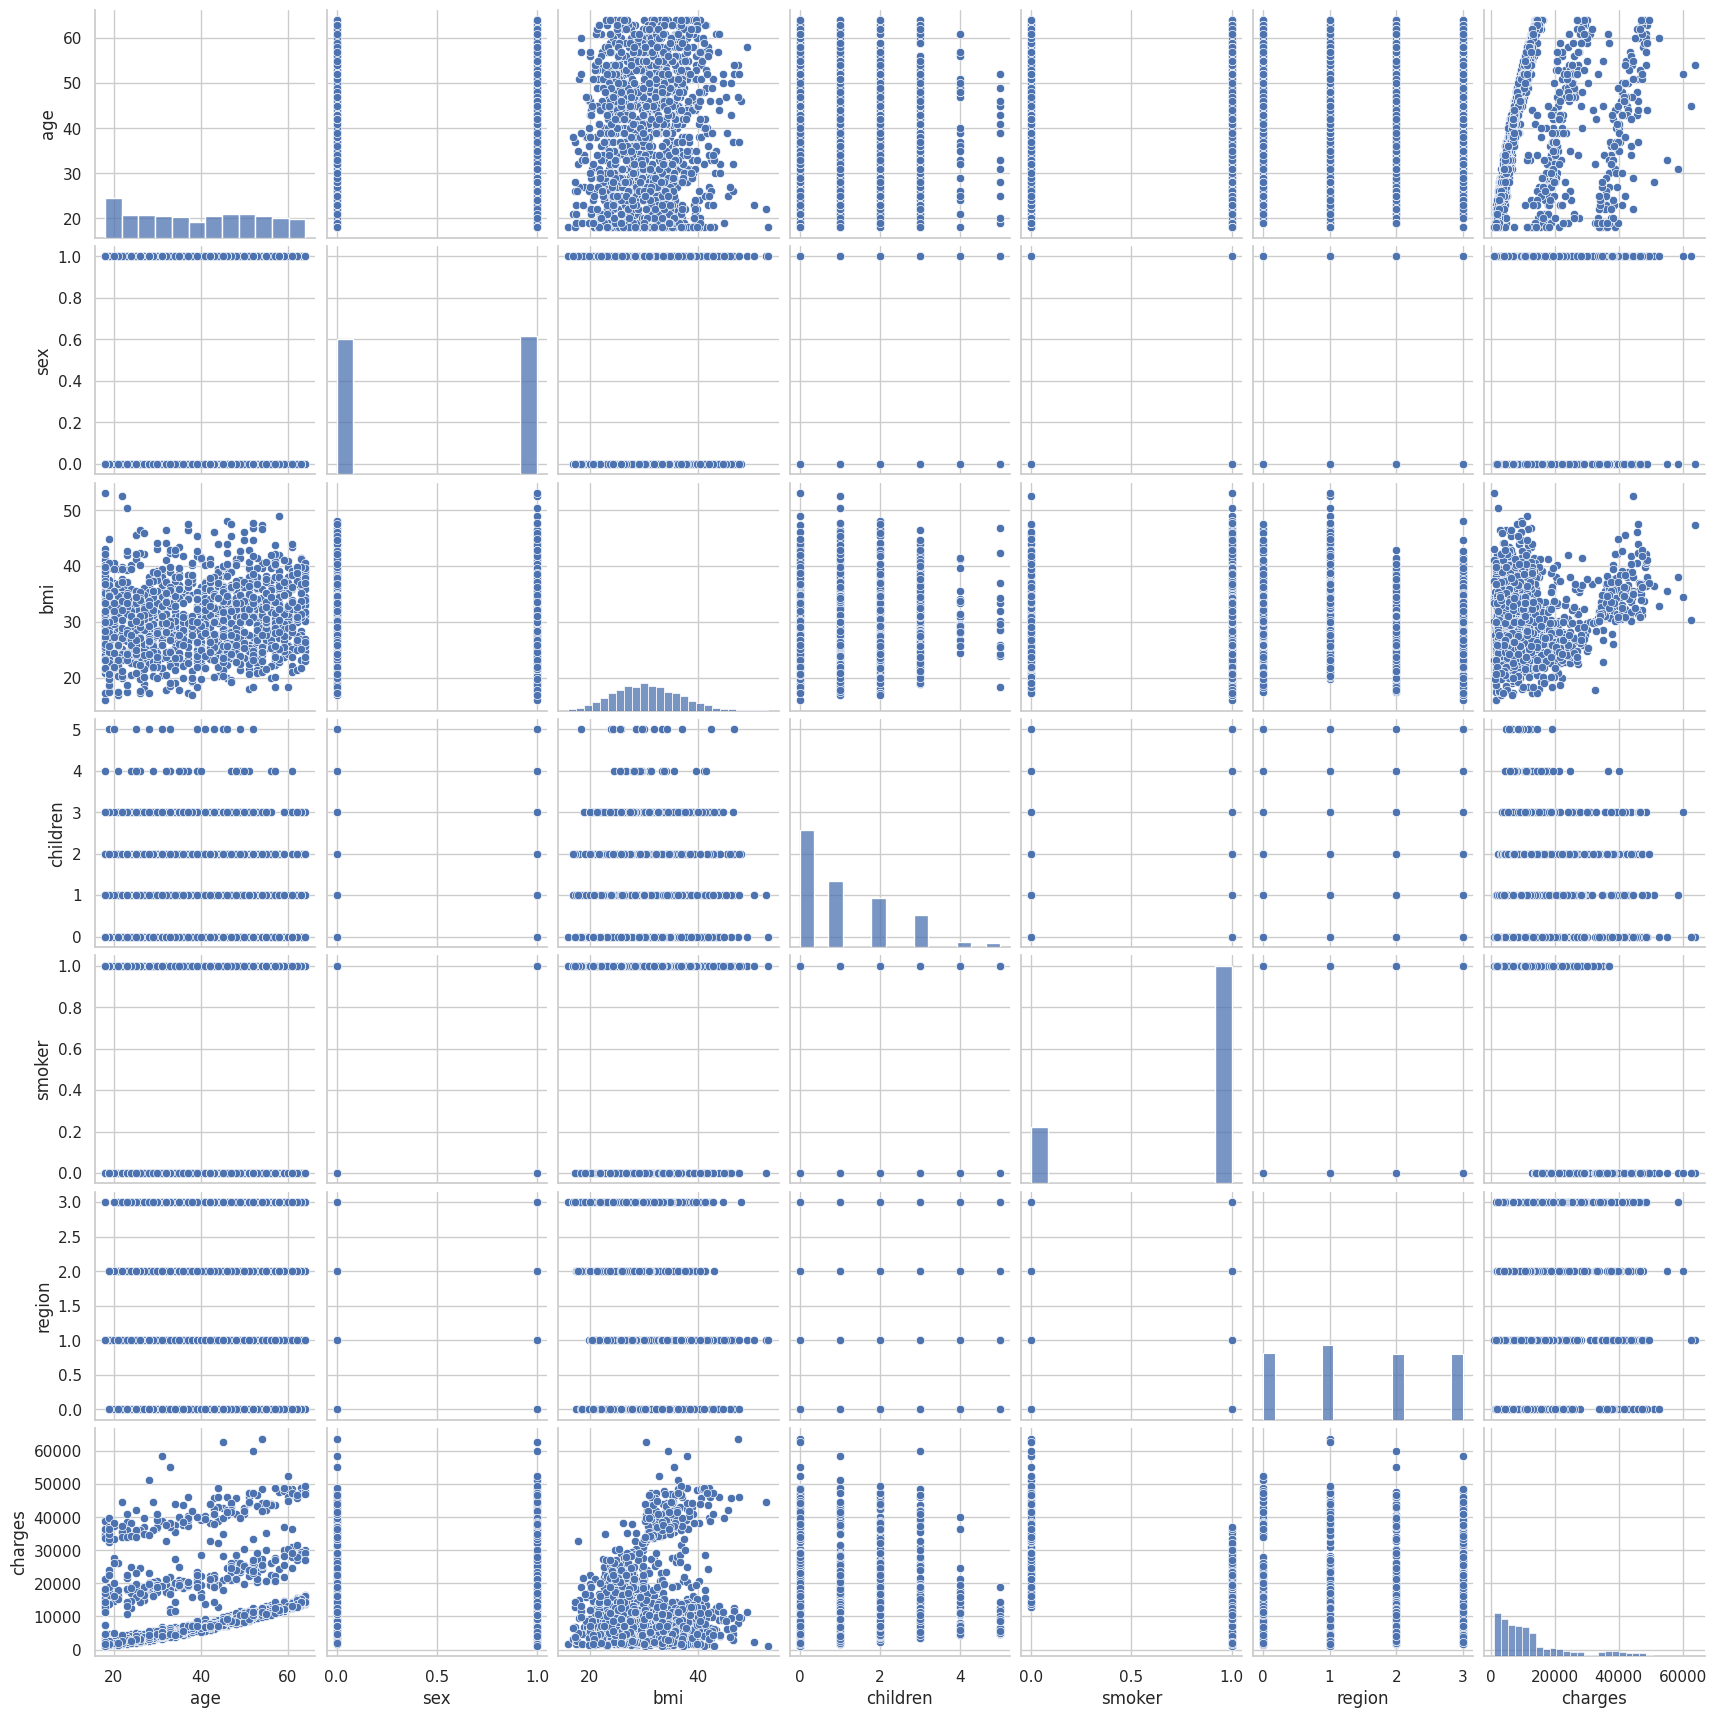

In [38]:
sns.pairplot(data = df)

# II. Feature engineering 

## 1. Análisis de outliers

La función .describe() nos permite observar la variabilidad así como los cuartiles de todas las variables. Lo realizamos para tomar apuntes.

In [39]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<Axes: ylabel='children'>

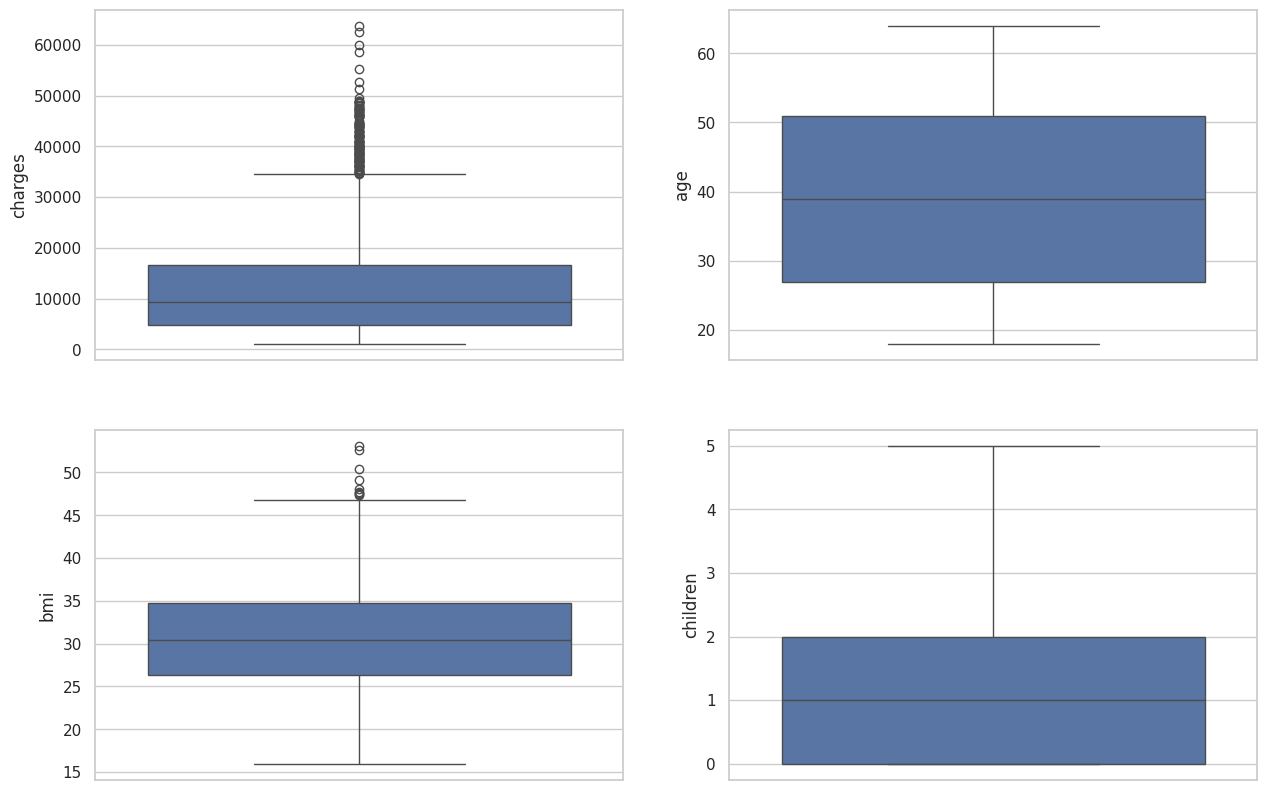

In [40]:
fig, axis = plt.subplots(2, 2, figsize = (15, 10))
sns.boxplot(ax = axis[0, 0], data = df, y = "charges")
sns.boxplot(ax = axis[0, 1], data = df, y = "age")
sns.boxplot(ax = axis[1, 0], data = df, y = "bmi")
sns.boxplot(ax = axis[1, 1], data = df, y = "children")

In [41]:
df.isnull().sum().sort_values(ascending=False) / len(df)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Separamos los datos en train y test y los almacenamos en nuestros directorios del proyecto.

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [43]:
train_data = pd.concat([X_train , y_train], axis= 1)
test_data = pd.concat([X_test , y_test], axis= 1)

In [44]:
train_data.to_csv("/workspaces/EDA_3/data/processed/medical_insurance_train_data.csv")
test_data.to_csv("/workspaces/EDA_3/data/processed/medical_insurance_test_data.csv")

In [45]:
y_train.to_csv("/workspaces/EDA_3/data/processed/medical_insurance_y_train.csv", index=False)
y_test.to_csv("/workspaces/EDA_3/data/processed/medical_insurance_y_test.csv", index=False)
X_train.to_csv("/workspaces/EDA_3/data/processed/medical_insurance_X_train.csv", index=False)
X_test.to_csv("/workspaces/EDA_3/data/processed/medical_insurance_X_test.csv", index=False)

In [46]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index)
X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index)


dump(scaler, open("/workspaces/EDA_3/models/scaler_std.pk", "wb"))

In [47]:
X_train_norm.head()

,0,1,2,3,4,5
132,0.976695,-1.000936,0.881367,0.749696,0.494439,-1.365660
1204,-1.516009,-1.000936,-0.543716,1.582777,-2.022493,-0.454368
421,1.546456,0.999065,0.874754,-0.916468,-2.022493,-0.454368
613,-0.376487,-1.000936,-1.912589,1.582777,0.494439,1.368217
1106,0.691814,-1.000936,-0.106437,-0.916468,0.494439,0.456925


In [48]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm_std = scaler.transform(X_train)
X_train_norm_std = pd.DataFrame(X_train_norm, index = X_train.index)
X_test_norm_std = scaler.transform(X_test)
X_test_norm_std = pd.DataFrame(X_test_norm, index = X_test.index)


dump(scaler, open("/workspaces/EDA_3/models/scaler_std.pk", "wb"))

In [49]:
X_test_norm_std.head()

,0,1,2,3,4,5
454,-0.518927,0.999065,2.638749,0.749696,0.494439,-0.454368
1189,-1.159908,-1.000936,-0.424683,-0.916468,0.494439,-1.365660
929,0.122054,0.999065,0.601972,-0.083386,0.494439,-0.454368
271,0.763034,0.999065,0.600318,0.749696,-2.022493,-1.365660
770,1.546456,0.999065,0.914432,1.582777,0.494439,-1.365660


In [50]:
X_train_norm_std.to_csv("/workspaces/EDA_3/data/interim/medical_insurance_X_train_std.csv", index=False)
X_test_norm_std.to_csv("/workspaces/EDA_3/data/interim/medical_insurance_X_test_std.csv", index=False)

In [51]:
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_norm_mm = scaler.transform(X_train)
X_train_norm_mm = pd.DataFrame(X_train_norm, index = X_train.index)
X_test_norm_mm = scaler.transform(X_test)
X_test_norm_mm = pd.DataFrame(X_test_norm, index = X_test.index)


dump(scaler, open("/workspaces/EDA_3/models/scaler_mm.pk", "wb"))

In [52]:
X_test_norm_mm.head()

,0,1,2,3,4,5
454,-0.518927,0.999065,2.638749,0.749696,0.494439,-0.454368
1189,-1.159908,-1.000936,-0.424683,-0.916468,0.494439,-1.365660
929,0.122054,0.999065,0.601972,-0.083386,0.494439,-0.454368
271,0.763034,0.999065,0.600318,0.749696,-2.022493,-1.365660
770,1.546456,0.999065,0.914432,1.582777,0.494439,-1.365660


In [53]:
X_train_norm_mm.to_csv("/workspaces/EDA_3/data/interim/medical_insurance_X_train_mm.csv", index=False)
X_test_norm_mm.to_csv("/workspaces/EDA_3/data/interim/medical_insurance_X_test_mm.csv", index=False)